
<table>
<tr>
<td width=15%><img src="./img/UGA.png"></img></td>
<td><center><h1>Introduction to Python for Data Sciences</h1></center></td>
<td width=15%><a href="http://www.iutzeler.org" style="font-size: 16px; font-weight: bold">Franck Iutzeler</a> </td>
</tr>
</table>



<br/><br/>

<center><a style="font-size: 40pt; font-weight: bold">Chap. 2 - Numpy and co. </a></center> 

<br/><br/>



# 1- Packages



Python has a large standard library, commonly cited as one of Python's greatest strengths, providing tools suited to many tasks. As of May, 2017, the official repository containing third-party software for Python, contains over 107,000 packages.

A *package* is a collection of *modules* i.e. groups of functions, classes, constants, types, etc.

## Built-in modules

To use a module, you have to *import* it using the command `import`.

In [1]:
import math

You can now use it in the code by using its name as a prefix. 

In [2]:
x = math.cos(2 * math.pi)

print(x)

1.0


To explore the function and other content of the module/library:
 * Use the web documentation (e.g. for the `math` library <a href="https://docs.python.org/3/library/math.html">Doc for Python 3</a>)
 * Use the built-in`help`

In [3]:
help(math)

Help on built-in module math:

NAME
    math

DESCRIPTION
    This module provides access to the mathematical functions
    defined by the C standard.

FUNCTIONS
    acos(x, /)
        Return the arc cosine (measured in radians) of x.
    
    acosh(x, /)
        Return the inverse hyperbolic cosine of x.
    
    asin(x, /)
        Return the arc sine (measured in radians) of x.
    
    asinh(x, /)
        Return the inverse hyperbolic sine of x.
    
    atan(x, /)
        Return the arc tangent (measured in radians) of x.
    
    atan2(y, x, /)
        Return the arc tangent (measured in radians) of y/x.
        
        Unlike atan(y/x), the signs of both x and y are considered.
    
    atanh(x, /)
        Return the inverse hyperbolic tangent of x.
    
    ceil(x, /)
        Return the ceiling of x as an Integral.
        
        This is the smallest integer >= x.
    
    comb(n, k, /)
        Number of ways to choose k items from n items without repetition and without order

In [4]:
help(math.sqrt)

Help on built-in function sqrt in module math:

sqrt(x, /)
    Return the square root of x.



Using the name prefix can make the code obfuscated as it can get quite verbose (e.g. `scipy.optimize.minimize`) so Python provides simpler ways to import:
* `import name as nickname`: the prefix to call is now `nickname`

In [5]:
import math as m

print(m.pi)

3.141592653589793


* `from name import function1,constant1` : `function1`  `constant1` can now be called directly. You can even import all contents with `from name import *` but this may be dangerous as names may conflict or override former ones, it is thus not advised except on user-generated modules.

In [6]:
from math import e,log

print(log(e**4))

4.0



## Installing packages


Python comes with a lot a lot of packages (ie. functions and small programs), provided by the community. To install a package `SomePackage`, the recommended way is know to use `pip` :

`python -m pip install SomePackage` or simply `pip install SomePackage`


See https://docs.python.org/3.9/installing/index.html for details on installing packages (and if you do not have `pip` installed, see https://packaging.python.org/tutorials/installing-packages/#requirements-for-installing-packages )


*Warning:* this is the preferred way, however:
* if you are using Anaconda, it is preferrable to install packages directly using the Anaconda interface, see https://docs.anaconda.com/anaconda/navigator/tutorials/manage-packages/ 
* If you don't have administrator rights on the machine (eg. at university), use `pip --user install SomePackage` to install a package locally.

Once installed, you can import the packages as above. 

In [7]:
import scipy

In [8]:
help(scipy)

Help on package scipy:

NAME
    scipy

DESCRIPTION
    SciPy: A scientific computing package for Python
    
    Documentation is available in the docstrings and
    online at https://docs.scipy.org.
    
    Contents
    --------
    SciPy imports all the functions from the NumPy namespace, and in
    addition provides:
    
    Subpackages
    -----------
    Using any of these subpackages requires an explicit import. For example,
    ``import scipy.cluster``.
    
    ::
    
     cluster                      --- Vector Quantization / Kmeans
     fft                          --- Discrete Fourier transforms
     fftpack                      --- Legacy discrete Fourier transforms
     integrate                    --- Integration routines
     interpolate                  --- Interpolation Tools
     io                           --- Data input and output
     linalg                       --- Linear algebra routines
     linalg.blas                  --- Wrappers to BLAS library
     li

Since a package (like `scipy`) is a collection of modules, you can import only a part of it. See https://docs.scipy.org/doc/scipy/reference/tutorial/index.html#user-guide for instance.

In [9]:
from scipy.stats import norm

norm.pdf(0.5)

0.3520653267642995

## Creating you own modules [*]

In order to reuse parts of your code, it is often efficient to write you own modules for often used functions. The *importation* of the module is the same as for other libraries to the difference that you have to give the (relative) path to the module.

In our example, the module file is `pyds.py` in the `./lib/` folder (you may open it to see what it contains). Two solutions to give the (relative) path to the module:
* add the folder `./lib` to the folder list of python

In [10]:
import sys

sys.path.append( "./lib" )

import pyds as pyds1

help(pyds1)

Help on module pyds:

NAME
    pyds

DESCRIPTION
    ######################################
    ### 
    ### the CLASS module
    ###
    ######################################

FUNCTIONS
    printQuote()

DATA
    teacherName = 'Franck Iutzeler'
    teacherWebsite = 'http://www.iutzeler.org'

FILE
    /home/franck/Pro/Cours/2021-2022/M1SSD_Python/Introduction-to-Python-for-Data-Sciences/lib/pyds.py




* Use the `lib` folder name as a package proxy (requires the presence of a - potentially void - file named `__init__.py` in the folder)

In [11]:
import lib.pyds as pyds2

pyds2.printQuote()

The joy of coding Python should be in seeing short, concise, readable classes that express a lot of action in a small amount of clear code -- not in reams of trivial code that bores the reader to death.

 -- Guido van Rossum


# 2- Numpy and Matplotlib



**Numpy** is a numerical calculus and algebra package that is widely used, notably providing the *array* (vector/matrix format) type used in almost all numerical projects.  [Documentation](https://numpy.org/doc/stable/) and [Reference](https://numpy.org/doc/stable/reference/index.html)


**Matplotlib** is a module for generating 2D and 3D graphics. [Documentation ](https://matplotlib.org/stable/contents.html) 


It is common to import them with the respective nicknames **np** and **plt** (for `matplotlib.pyplot`).

In [12]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

The last line `%matplotlib inline` is a command for Jupyter to indicate that we want our figures in the notebook and not in a separate window.

## Numpy *arrays*

In Numpy, the type *array* is used for vector, matrices, tensors (a matrix type also exists but is more seldomly used).

Numpy arrays can be defined either directly from a list or outputted by a function.


### One-dimensional arrays

In [13]:
x = np.array([1, 2.5, 5, 10])
print(x,type(x))

[ 1.   2.5  5.  10. ] <class 'numpy.ndarray'>


In [14]:
y = np.random.rand(4)
print(y,type(y))

[0.0749064  0.22495348 0.22248318 0.04446907] <class 'numpy.ndarray'>


## Plotting

Visualizing the data is quite simple with pyplot:
* Initialize a figure with  `plt.figure()`
* Plot something with ... `plt.plot` (see the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html?highlight=pyplot#module-matplotlib.pyplot) )
* Fix labels, titles, axes
* Eventually save the result with `plt.savefig`
* Show the figure with `plt.show()`

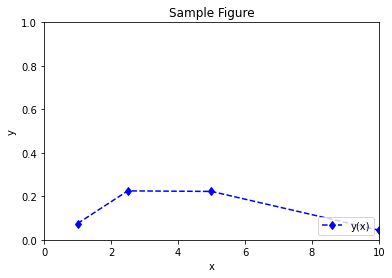

In [15]:
plt.figure()

plt.plot(x,y, 'bd--', label='y(x)')

plt.legend(loc='lower right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sample Figure')
plt.xlim([0, 10])
plt.ylim([0, 1])
plt.savefig('img/sample.png')
plt.show()

## Matrices

Matrices are simply 2D arrays. Since vectors and matrices share the same type, the notion of *shape* is very important.

In [16]:
M = np.array([[0.25, 6.2, 1, 10],[12, 6.2, 6, -5.3]])
print(M,type(M))

[[ 0.25  6.2   1.   10.  ]
 [12.    6.2   6.   -5.3 ]] <class 'numpy.ndarray'>


In [17]:
print(x,type(x))

[ 1.   2.5  5.  10. ] <class 'numpy.ndarray'>


* The `size` of an array is the number of elements while the `shape` gives how they are arranged.

In [18]:
print(x.size)  # or equivalently np.size(x)
print(M.size)

4
8


In [19]:
print(x.shape)  # or equivalently np.shape(x)
print(M.shape)

(4,)
(2, 4)


* The element access, assignment, type, copy is common and similar to the list type.

In [20]:
print(x)
print(x[2],x[-1])
print(x[::-1])
x[0] = 6.1554
print(x)

[ 1.   2.5  5.  10. ]
5.0 10.0
[10.   5.   2.5  1. ]
[ 6.1554  2.5     5.     10.    ]


In [21]:
v = x
w = np.copy(x) 
print(v)
x[0]=1
print(v)
print(w)

[ 6.1554  2.5     5.     10.    ]
[ 1.   2.5  5.  10. ]
[ 6.1554  2.5     5.     10.    ]


In [22]:
print(M)
print(M[1,2],type(M[1,2]))
print(M[1,:],type(M[1,:]),M[1,:].shape)
print(M[1])
print(M[:,0])

[[ 0.25  6.2   1.   10.  ]
 [12.    6.2   6.   -5.3 ]]
6.0 <class 'numpy.float64'>
[12.   6.2  6.  -5.3] <class 'numpy.ndarray'> (4,)
[12.   6.2  6.  -5.3]
[ 0.25 12.  ]


Advanced access to content and modification is possible

In [23]:
x = np.array([1, 2.5, 5, 10])
ind = [0,2,3]
print(x[ind])

[ 1.  5. 10.]


### Advanced array properties [*]


An array has a *type* that can be accessed with <tt>dtype</tt>, it the combination of a base type (<tt>int, float, complex, bool, object,</tt> etc.) and a precision in bits (<tt>int64, int16, float128, complex128</tt>)

In [24]:
print(x.dtype)

float64


Array only accept they casting to their own type. However, the type of an array can be changed.

In [25]:
try:
    x[0] = 1 + 2.0j
except Exception as e:
    print(e)

can't convert complex to float


In [26]:
y = x.astype(complex)
y[0] = 1 + 2.0j
print(y,type(y),y.dtype)

[ 1. +2.j  2.5+0.j  5. +0.j 10. +0.j] <class 'numpy.ndarray'> complex128


## Numpy array generation

See the corresponding [documentation](https://numpy.org/doc/stable/user/basics.creation.html)

### Number sequences


`arange` returns an array of evenly spaced number from `start` to (at most) `stop` with a fixed jump `step` 


`linspace` returns an array of evenly spaced number from `start` to (exactly) `stop` with a fixed number of points `num`

In [27]:
x = np.arange(0, 10, 1.5)
print(x,type(x))

[0.  1.5 3.  4.5 6.  7.5 9. ] <class 'numpy.ndarray'>


In [28]:
y = np.linspace(0, 10, 25)
print(y,type(y))

[ 0.          0.41666667  0.83333333  1.25        1.66666667  2.08333333
  2.5         2.91666667  3.33333333  3.75        4.16666667  4.58333333
  5.          5.41666667  5.83333333  6.25        6.66666667  7.08333333
  7.5         7.91666667  8.33333333  8.75        9.16666667  9.58333333
 10.        ] <class 'numpy.ndarray'>


### Zeros and Ones


`zeros` returns an array (of floats) of zeros  of the precised `shape`

`ones`  returns an array (of floats) of ones  of the precised `shape`

`eye`  returns a square 2D-array (of floats) with ones on the diagonal and zeros elsewhere  

In [29]:
x = np.zeros(3)
print(x,x.shape,type(x),x.dtype)

x = np.zeros((3,))
print(x,x.shape,type(x),x.dtype)

[0. 0. 0.] (3,) <class 'numpy.ndarray'> float64
[0. 0. 0.] (3,) <class 'numpy.ndarray'> float64


In [30]:
try:
    x = np.zeros(3,3) # This causes an error as 3,3 is not a shape, it is (3,3) -> double parentheses
except Exception as error:
    print(error)

print(x,x.shape,type(x),x.dtype)

Cannot interpret '3' as a data type
[0. 0. 0.] (3,) <class 'numpy.ndarray'> float64


In [31]:
x = np.zeros((3,3))
print(x,x.shape,type(x),x.dtype)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] (3, 3) <class 'numpy.ndarray'> float64


In [32]:
y = np.ones(2)
y

array([1., 1.])

In [33]:
M = np.eye(3)
print(M,M.shape,type(M),M.dtype)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] (3, 3) <class 'numpy.ndarray'> float64


### Random data


Random arrays can be generated by Numpy's [random](https://numpy.org/doc/stable/reference/random/index.html) module.


`rand` returns an array (of floats) of uniformly distributed numbers in [0,1)  of the precised dimension

`randn`  returns an array (of floats) of numbers from the normal distribution of the precised dimension

`randint`  returns an array (of floats) of integers from the discrete uniform distribution

In [34]:
np.random.rand(5) 

array([0.09708256, 0.28084182, 0.03623694, 0.83693802, 0.89064811])

In [35]:
np.random.randn(5,2)

array([[-0.13167876,  0.53288997],
       [ 1.94922176, -0.55397441],
       [-0.8463868 , -1.96584426],
       [ 0.23209953,  0.58799903],
       [-0.08861985,  0.27334093]])

In [36]:
np.random.randint(0,100,size=(10,))

array([88,  6, 78,  3, 18, 17, 96, 13, 13, 90])

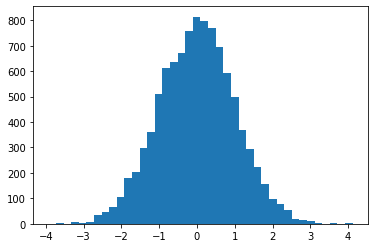

In [37]:
a = np.random.randn(10000)
plt.figure()
plt.hist(a,40) # histogram of a with 40 bins
plt.show()

## Operations on Matrices and vectors 


In [38]:
v = np.arange(0, 5)
print(v)

[0 1 2 3 4]


In [39]:
v * 2

array([0, 2, 4, 6, 8])

In [40]:
v + 2.5

array([2.5, 3.5, 4.5, 5.5, 6.5])

In [41]:
square = v**2
root = np.sqrt(v)
print(square,root)

[ 0  1  4  9 16] [0.         1.         1.41421356 1.73205081 2.        ]


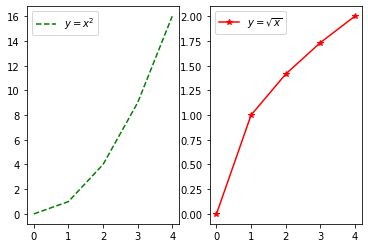

In [42]:
plt.figure()
plt.subplot(1,2,1)
plt.plot(square,'g--', label='$y = x^2$')
plt.legend(loc=0)
plt.subplot(1,2,2)
plt.plot(root, 'r*-', label='$y = \sqrt{x}$')
plt.legend(loc=2)
plt.show()

In [43]:
A = np.array([[n+m*10 for n in range(5)] for m in range(4)])
print(A)

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]]


In [44]:
A*2

array([[ 0,  2,  4,  6,  8],
       [20, 22, 24, 26, 28],
       [40, 42, 44, 46, 48],
       [60, 62, 64, 66, 68]])

In [45]:
A+2.5

array([[ 2.5,  3.5,  4.5,  5.5,  6.5],
       [12.5, 13.5, 14.5, 15.5, 16.5],
       [22.5, 23.5, 24.5, 25.5, 26.5],
       [32.5, 33.5, 34.5, 35.5, 36.5]])

Matrices can be visualized as images.

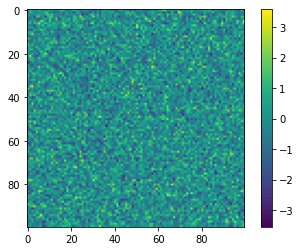

In [46]:
C = np.random.randn(100,100)
plt.figure()
plt.imshow(C)
plt.colorbar()
plt.show()

## Matrix and vector operations



*Warning:* Operation symbols `+   -   *  /` correspond to *elementwise* operations! To perform, matrix/vector multiplication, dedicated function must be used. 

### Elementwise operations

In [47]:
A = np.array([[n+m*10 for n in range(5)] for m in range(4)])
v = np.random.randint(0,5,5)
print(A,v)

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]] [4 3 2 3 3]


In [48]:
A*A

array([[   0,    1,    4,    9,   16],
       [ 100,  121,  144,  169,  196],
       [ 400,  441,  484,  529,  576],
       [ 900,  961, 1024, 1089, 1156]])

In [49]:
v*v

array([16,  9,  4,  9,  9])

In [50]:
A*v

array([[  0,   3,   4,   9,  12],
       [ 40,  33,  24,  39,  42],
       [ 80,  63,  44,  69,  72],
       [120,  93,  64,  99, 102]])

### Transposition

It can be useful to transpose, it is simply done by suffixing `.T` (or equivalently using the function `np.transpose`). Similarly `.H` is the Hermitian conjugate,  `.imag`  `.real` are the real and imaginary parts and  `.abs` the modulus (their *full* versions are respectively `np.conjugate`, `np.imag`, etc.)

In [51]:
print(A,A.shape)
print(A.T,A.T.shape)

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]] (4, 5)
[[ 0 10 20 30]
 [ 1 11 21 31]
 [ 2 12 22 32]
 [ 3 13 23 33]
 [ 4 14 24 34]] (5, 4)


### Matrix/vector operations

$y=Av$ can be obtained by `y = A.dot(v)` (or equivalently `y = np.dot(A,v)`). This methods works for array with *compatible shape* (matrix-matrix, matrix-vector, vector-matrix, vector-vector, etc).


In [52]:
y = np.dot(A,v)
print(A,A.shape,v,v.shape)
print(y,type(y),y.shape)

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]] (4, 5) [4 3 2 3 3] (5,)
[ 28 178 328 478] <class 'numpy.ndarray'> (4,)


Example of vector-vector multiplication i.e. a scalar product

In [53]:
s = v.dot(v)
print(v, s, type(s))

[4 3 2 3 3] 47 <class 'numpy.int64'>


Example of non-compatible shapes

In [54]:
try:
    A2 = np.dot(A,A)
except Exception as error:
    print(error)

shapes (4,5) and (4,5) not aligned: 5 (dim 1) != 4 (dim 0)


In [55]:
A3 = np.dot(A,A.T)
print(A3,A3.shape)

[[  30  130  230  330]
 [ 130  730 1330 1930]
 [ 230 1330 2430 3530]
 [ 330 1930 3530 5130]] (4, 4)


From a vector $v$, one can form the matrix $P=v v^T$ by `A=v.outer(v)` (or equivalently `np.outer(v,v)`)

In [56]:
P = np.outer(v,v)
print(P)

[[16 12  8 12 12]
 [12  9  6  9  9]
 [ 8  6  4  6  6]
 [12  9  6  9  9]
 [12  9  6  9  9]]


### Useful Functions

See the Documentation on [arrays](https://numpy.org/doc/stable/reference/arrays.ndarray.html)  and  [array creation](https://numpy.org/doc/stable/reference/routines.array-creation.html).

*Warning:* Modificators such as transpose, reshape, etc. do not modify the matrix, if you want to keep the result of the operation, you have to assign a variable to it. The notable exceptions are precised as *in-place* in the documentation.

In [57]:
A.reshape((2,10))

array([[ 0,  1,  2,  3,  4, 10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24, 30, 31, 32, 33, 34]])

In [58]:
print(A)

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]]


In [59]:
B = A.flatten()
print(B)

[ 0  1  2  3  4 10 11 12 13 14 20 21 22 23 24 30 31 32 33 34]


In [60]:
print(A.trace(),A.max(),A.argmax())

66 34 19


Some functions may be taken with respects to the columns with <tt>axis=0</tt> or lines with <tt>axis=1</tt>.

In [61]:
print(A.mean(),A.mean(axis=0),A.mean(axis=1))

17.0 [15. 16. 17. 18. 19.] [ 2. 12. 22. 32.]


In [62]:
print(A.var(),A.var(axis=0),A.std(axis=1))

127.0 [125. 125. 125. 125. 125.] [1.41421356 1.41421356 1.41421356 1.41421356]


### Repetition, concatenation

In [63]:
a = np.array([[1, 2], [3, 4]])
a

array([[1, 2],
       [3, 4]])

In [64]:
b = np.array([[5, 6]])
b

array([[5, 6]])

In [65]:
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [66]:
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

In [67]:
np.vstack((a,b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [68]:
np.hstack((a,b.T))

array([[1, 2, 5],
       [3, 4, 6]])

### Iterating on arrays

In [69]:
v = np.array([1,2,3,4])

for element in v:
    print(element)

1
2
3
4


In [70]:
a = np.array([[1,2], [3,4]])

for row in a:
    print("row", row)
    
    for element in row:
        print(element)

row [1 2]
1
2
row [3 4]
3
4


<tt>enumerate</tt> can be used to get indexes along with elements.

In [71]:
for row_idx, row in enumerate(a):
    print("row_idx", row_idx, "row", row)
    
    for col_idx, element in enumerate(row):
        print("col_idx", col_idx, "element", element)
       
        # update the matrix a: square each element
        a[row_idx, col_idx] = element ** 2

row_idx 0 row [1 2]
col_idx 0 element 1
col_idx 1 element 2
row_idx 1 row [3 4]
col_idx 0 element 3
col_idx 1 element 4


In [72]:
a

array([[ 1,  4],
       [ 9, 16]])

# 3- Linear Algebra 


Numpy comes with an efficient linear algebra module named `linalg` (see the [documentation](https://numpy.org/doc/stable/reference/routines.linalg.html) ). As in many languages, the more vectorized the operations are, the more efficient.

## Decompositions


* *QR:* `linalg.qr` Factor the matrix $A$ as $QR$, where $Q$ is orthonormal and $R$ is upper-triangular.
* *Cholesky:* `linalg.cholesky` Return the Cholesky decomposition, $L L^H$, of the square matrix $A$, where $L$ is lower-triangular. $A$ must be Hermitian and positive-definite. Only $L$ is actually returned.
* *SVD:* `linalg.svd`  Factors the matrix $A$ as $U  \text{diag}(s) V$, where $U$ and $V$ are unitary and $s$ is a 1-d array of $A$‘s singular values.



In [73]:
A = np.random.randn(3,2)

In [74]:
Q, R = np.linalg.qr(A)
print(A)
print(Q)
print(R)

[[-0.19169683 -0.06738807]
 [ 0.73213885  0.09261738]
 [ 0.05779475  0.20352188]]
[[-0.2525575  -0.18377434]
 [ 0.96458118 -0.12508222]
 [ 0.07614366  0.97497766]]
[[0.75902253 0.12185325]
 [0.         0.19922869]]


In [75]:
np.allclose(A, np.dot(Q, R)) # check that A=QR

True

In [76]:
U, s, V = np.linalg.svd(A)
print(U.shape, V.shape, s.shape)

(3, 3) (2, 2) (2,)


In [77]:
S = np.zeros(A.shape)
S[:A.shape[1], :A.shape[1]] = np.diag(s)
np.allclose(A, np.dot(U, np.dot(S, V)))

True

By default, $U$ and $V$ have the shapes $(M, M)$ and $(N, N)$  respectively if $A$ is $(M,N)$. If `full_matrices=False` is passed, the shapes are $(M, K)$ and $(K, N)$, respectively, where $K = min(M, N)$.

In [78]:
U, s, V = np.linalg.svd(A, full_matrices=False)
print(U.shape, V.shape, s.shape)

(3, 2) (2, 2) (2,)


In [79]:
S = np.diag(s)
np.allclose(A, np.dot(U, np.dot(S, V)))

True

## Eigenvalues

`linalg.eig` compute the eigenvalues and right eigenvectors of a square array and is the main function (`linalg.eigvals` computes eigenvalues of a non-symmetric array, `linalg.eigh` returns eigenvalues and eigenvectors of a symmetric or Hermitian array).

In [80]:
A = np.array([[1, -1], [1, 1]])
print(A)
l, v = np.linalg.eig(A)
print(l); print(v)

[[ 1 -1]
 [ 1  1]]
[1.+1.j 1.-1.j]
[[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


In [81]:
A.dot(v[:,0])

array([0.70710678+0.70710678j, 0.70710678-0.70710678j])

We can check that $Ax= \lambda x$.

In [82]:
np.allclose(A.dot(v[:,0]),l[0]*v[:,0])

True

## Norms and other numbers

The function `linalg.norm` is able to return one of eight different matrix norms, or one of an infinite number of vector norms (described below), depending on the value of the `ord` parameter.

<table border="1" class="docutils">
<colgroup>
<col width="8%" />
<col width="47%" />
<col width="44%" />
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">ord</th>
<th class="head">norm for matrices</th>
<th class="head">norm for vectors</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td>None</td>
<td>Frobenius norm</td>
<td>2-norm</td>
</tr>
<tr class="row-odd"><td>&#8216;fro&#8217;</td>
<td>Frobenius norm</td>
<td>&#8211;</td>
</tr>
<tr class="row-even"><td>&#8216;nuc&#8217;</td>
<td>nuclear norm</td>
<td>&#8211;</td>
</tr>
<tr class="row-odd"><td>inf</td>
<td>max(sum(abs(x), axis=1))</td>
<td>max(abs(x))</td>
</tr>
<tr class="row-even"><td>-inf</td>
<td>min(sum(abs(x), axis=1))</td>
<td>min(abs(x))</td>
</tr>
<tr class="row-odd"><td>0</td>
<td>&#8211;</td>
<td>sum(x != 0)</td>
</tr>
<tr class="row-even"><td>1</td>
<td>max(sum(abs(x), axis=0))</td>
<td>as below</td>
</tr>
<tr class="row-odd"><td>-1</td>
<td>min(sum(abs(x), axis=0))</td>
<td>as below</td>
</tr>
<tr class="row-even"><td>2</td>
<td>2-norm (largest sing. value)</td>
<td>as below</td>
</tr>
<tr class="row-odd"><td>-2</td>
<td>smallest singular value</td>
<td>as below</td>
</tr>
<tr class="row-even"><td>other</td>
<td>&#8211;</td>
<td>sum(abs(x)$^{ord}$)$^{(1./ord)}$</td>
</tr>
</tbody>
</table>

In [83]:
a = np.arange(9) - 4
B = a.reshape((3, 3))

In [84]:
print(a)
print("none \t",np.linalg.norm(a))
print("2 \t",np.linalg.norm(a,ord=2))
print("1 \t",np.linalg.norm(a,ord=1))
print("inf \t",np.linalg.norm(a,ord=np.inf))
print("0 \t",np.linalg.norm(a,ord=0))

[-4 -3 -2 -1  0  1  2  3  4]
none 	 7.745966692414834
2 	 7.745966692414834
1 	 20.0
inf 	 4.0
0 	 8.0


In [85]:
print(B)
print("none \t",np.linalg.norm(B))
print("2 \t",np.linalg.norm(B,ord=2))
print("1 \t",np.linalg.norm(B,ord=1))
print("inf \t",np.linalg.norm(B,ord=np.inf))
print("fro \t",np.linalg.norm(B,ord='fro'))

[[-4 -3 -2]
 [-1  0  1]
 [ 2  3  4]]
none 	 7.745966692414834
2 	 7.348469228349533
1 	 7.0
inf 	 9.0
fro 	 7.745966692414834


Other useful function include the condition number `linalg.cond`, or rank `linalg.matrix_rank` .

In [86]:
A = np.array([[1, 0, -1], [0, 1, 0], [1, 0, 1]]) # some matrix
I = np.eye(4) # identity
Def =  np.eye(4); Def[0,0]=0 # rank deficient

In [87]:
print(np.linalg.cond(A), np.linalg.cond(I))

1.4142135623730951 1.0


In [88]:
np.linalg.cond(Def)

inf

In [89]:
print(np.linalg.matrix_rank(A), np.linalg.matrix_rank(I), np.linalg.matrix_rank(Def))

3 4 3


## Solving equations and inverting matrices

When $A$ is full-rank, finding $x$ such that $Ax=b$ can be done efficiently using `linalg.solve` (as a general remark it is in general bad to invert $A$ for solving such equations, although this can be done by `linalg.inv`). 

In [90]:
A = np.array([[3,1], [1,2]])
b = np.array([9,8])
print(A)
print(b)

[[3 1]
 [1 2]]
[9 8]


In [91]:
x_sol = np.linalg.solve(A,b)

print(x_sol , np.allclose(A.dot(x_sol),b))

[2. 3.] True


In [92]:
A_inv = np.linalg.inv(A)
x_sol2 = A_inv.dot(b)

print(x_sol2 , np.allclose(A.dot(x_sol2),b))

[2. 3.] True


Why you don't want to invert a matrix except if really needed:

In [93]:
N= 100
A = np.random.randn(N,N)
b = np.random.randn(N)

In [94]:
%timeit x_sol = np.linalg.solve(A,b)

209 µs ± 68.7 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [95]:
%timeit A_inv = np.linalg.inv(A) ; x_sol2 = A_inv.dot(b)

295 µs ± 28.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


If $A$ is not full-rank, the least squares solution of $Ax=b$  (i.e $x$ that minimizes $\|Ax-b\|_2$) can be obtained by `linalg.lstsq` and  `linalg.pinv` give the Moore-Penrose pseudo inverse.

# 4- Exercises

> **Exercise 1:** In polynomial regression, we are given $n$ points $(x_i,y_i)$ and fit a size-$m$ polynome $f(x) = c_0 + c_1 x + c_2 x^2 + .. + c_m x^m$ so that $f(x_i)\approx y_i$ for all $i=1,..n$.
> 
> In this exercise, we want to find the $m+1$ coefficients $(c_j)$ that minimize the least square error
> $$  \left\| ~~~ \underbrace{ \left[ \begin{array}{ccccc} 1 & x_1 & x_1^2 & .. & x_1^m \\ 1 & x_2 & x_2^2 & .. & x_2^m \\ \vdots & \vdots & \vdots & \vdots & \vdots \\ 1 & x_n & x_n^2 & .. & x_n^m  \end{array}  \right] }_{X} ~ \underbrace{ \left[ \begin{array}{c} c_0 \\ c_1 \\ c_2 \\ \vdots \\ c_m \end{array} \right] }_{c} - \underbrace{  \left[ \begin{array}{c} y_1 \\ y_2 \\ \vdots \\ y_n \end{array} \right] }_{y} \right\|^2  $$
> 1. Construct the matrix $X$ from the given vector $x$ below with $m=3$.
> *  Find the optimal $c$ by solving the least square problem $\min_c \|Xc-y\|^2$ using Numpy (`lstsq` and `solve`). Is the result exact (no error)?
> * Plot the obtained polynome on the scatter plot.
> * Redo questions 2-3 by varying the relative sizes of $n$ and $m$. What do you observe?

In [96]:
import numpy as np

n = 30 # Number of sample points

x = (np.random.rand(n)-0.5)*6
y = np.sign(x)*np.maximum(np.abs(x)-1.0,0.0)

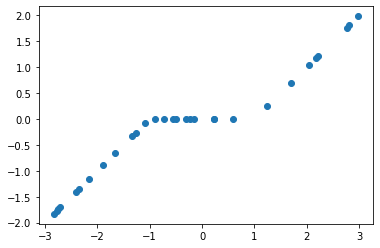

In [97]:
import matplotlib.pyplot as plt

plt.scatter(x,y)